In [1]:
# using my local development version Hyperopt, will modify in the future
using Hyperopt, Distributions, Random, Plots

In [2]:
bws = [0.5 0.1 0.05]
d = Normal(0, 1)
observations = rand(d, 700)
x = LinRange(-2, 2, 100)
ys = []
for bw in bws
    kde = Hyperopt.LazyKDE(observations, bw, Hyperopt.Continuous(), Hyperopt.gaussian, true)
    y = [Hyperopt.pdf(kde, _x, keep_all=false) for _x in x]
    push!(ys, y)
end

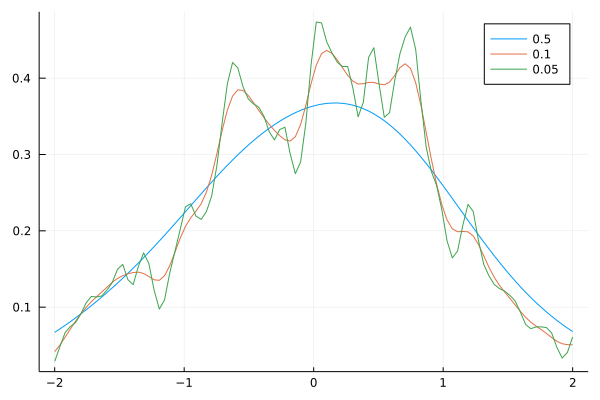

In [3]:
plot(x, ys, label=bws)